In [88]:
#set depdendies
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns; sns.set(color_codes=True)

In [33]:
url = "https://api.datausa.io/api/?sort=desc&show=geo&required=grads_total&sumlevel=state&cip=26&year=all"

In [34]:
# Make an API call to the API and convert response object to JSON
json = requests.get(url).json()

In [35]:
#see the data
#json

In [36]:
# Converting the response to JSON
data = [dict(zip(json["headers"], d)) for d in json["data"]]

In [37]:
x =data[0]

In [38]:
# explore the structure of the returned JSON object
json['headers']

['year', 'geo', 'cip', 'grads_total']

In [39]:
r = requests.get(url)
x = r.json()
biology_df = pd.DataFrame(data)

biology_df.head()

,cip,geo,grads_total,year
0,26,04000US01,1786,2013
1,26,04000US02,138,2013
2,26,04000US04,2316,2013
3,26,04000US05,754,2013
4,26,04000US06,16046,2013


In [40]:
biology_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
cip            162 non-null object
geo            162 non-null object
grads_total    162 non-null int64
year           162 non-null int64
dtypes: int64(2), object(2)
memory usage: 5.1+ KB


In [41]:
biology_df['geo'][0][-2:]

'01'

In [42]:
# make a new column that takes just the last two digits
biology_df['State'] = biology_df['geo'].str[-2:]
biology_df.head()

,cip,geo,grads_total,year,State
0,26,04000US01,1786,2013,01
1,26,04000US02,138,2013,02
2,26,04000US04,2316,2013,04
3,26,04000US05,754,2013,05
4,26,04000US06,16046,2013,06


In [43]:
biology_df.dtypes

cip            object
geo            object
grads_total     int64
year            int64
State          object
dtype: object

In [44]:
code_df = pd.read_csv("/Users/RoFo/Dropbox/Data_Science_BC/codes.csv")
#code_df = code_df.drop('Unnamed: 2', 1)
#changed it into an object
code_df['Code'] = code_df['Code'].apply('{:0>2}'.format)
code_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
Code     54 non-null object
State    54 non-null object
dtypes: object(2)
memory usage: 944.0+ bytes


In [45]:
code_df.dtypes

Code     object
State    object
dtype: object

In [130]:
# grad_merge = final graduate data set
merged_df = biology_df.merge(code_df, left_on='State', right_on='Code', how='outer')
grad_merge_df = merged_df.drop(['cip','geo','State_x','Code'], axis=1)
grad_merge_df

,grads_total,year,State_y
0,1786,2013,Alabama
1,1834,2014,Alabama
2,1847,2015,Alabama
3,138,2013,Alaska
4,134,2014,Alaska
5,149,2015,Alaska
6,2316,2013,Arizona
7,2375,2014,Arizona
8,2572,2015,Arizona
9,754,2013,Arkansas


In [131]:
#now merge brewery data sets (Brewery and Convert)
Brewery_df = pd.read_csv("Brewery.csv")
Brewery_df = Brewery_df.rename(columns={'Unnamed: 0': 'State'})
Brewery_df

,State,2013,2014,2015
0,AK,25,28,35
1,AL,23,25,30
2,AR,18,23,29
3,AZ,59,77,91
4,CA,528,654,788
5,CO,234,300,352
6,CT,39,50,59
7,DC,11,12,13
8,DE,13,15,21
9,FL,113,158,205


In [48]:
Convert_df = pd.read_csv("Convert.csv")
Convert_df = Convert_df.rename(columns={'Abbreviation': 'State Ab', 'FullStateName' : 'Full State Name'})
Convert_df.head()

,State Ab,Full State Name
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


In [49]:
#final_beer_merge = final brewery data set
the_merged_brew_df = Brewery_df.merge(Convert_df, left_on='State', right_on='State Ab', how='outer')
final_beer_merge_df = the_merged_brew_df.drop(['State Ab'], axis=1)
final_beer_merge_df.head()

,State,2013,2014,2015,Full State Name
0,AK,25.0,28.0,35.0,Alaska
1,AL,23.0,25.0,30.0,Alabama
2,AR,18.0,23.0,29.0,Arkansas
3,AZ,59.0,77.0,91.0,Arizona
4,CA,528.0,654.0,788.0,California


In [50]:
final_beer_merge_df.dtypes

State               object
2013               float64
2014               float64
2015               float64
Full State Name     object
dtype: object

In [51]:
grad_merge_df.dtypes

grads_total     int64
year            int64
State_y        object
dtype: object

In [52]:
print(type(final_beer_merge_df))

<class 'pandas.core.frame.DataFrame'>


In [53]:
final_beer_merge_df.columns

Index(['State', '2013', '2014', '2015', 'Full State Name'], dtype='object')

In [54]:
grad_merge_df.columns

Index(['grads_total', 'year', 'State_y'], dtype='object')

In [55]:
print(type(grad_merge_df))

<class 'pandas.core.frame.DataFrame'>


In [65]:
#get big data set --> merge final_beer_merge and grad_merge data sets
bio_beer_df= final_beer_merge_df.merge(grad_merge_df, left_on='Full State Name', right_on='State_y', how='outer')

In [66]:
bio_beer_df.head()

,State,2013,2014,2015,Full State Name,grads_total,year,State_y
0,AK,25.0,28.0,35.0,Alaska,138.0,2013.0,Alaska
1,AK,25.0,28.0,35.0,Alaska,134.0,2014.0,Alaska
2,AK,25.0,28.0,35.0,Alaska,149.0,2015.0,Alaska
3,AL,23.0,25.0,30.0,Alabama,1786.0,2013.0,Alabama
4,AL,23.0,25.0,30.0,Alabama,1834.0,2014.0,Alabama


In [135]:
bio_beer_df = bio_beer_df[['State', 'Full State Name', 'year', '2013', '2014', '2015', 'grads_total']]
bio_beer_df = bio_beer_df.rename(columns={'2013': '2013 Brew', '2014' : '2014 Brew', '2015' : '2015 Brew'})
print(bio_beer_df.head())
new_pivot_like_df = bio_beer_df.setIndex
new_pivot_like_df

KeyError: "['2013' '2014' '2015'] not in index"

In [134]:
#itterows

grads_2013 = []

for index, row in bio_beer_df.iterrows():
    if row["year"] == 2013.0:
        grads_2013.append(int(row["grads_total"]))

2013.0


In [128]:
beers_all = bio_beer_df[["Full State Name", "2013 Brew", "2014 Brew", "2015 Brew"]]
beers_all.drop_duplicates(inplace=True)
beers_all.reset_index(drop=True, inplace=True)
beers_all.set_index("Full State Name", inplace=True)
len(beers_all)

/Users/RoFo/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


53

In [129]:
len(grads_2013)

54

In [111]:
bio_beer_fifteen_df = bio_beer_df[bio_beer_df['year'] == 2013.0]

In [117]:
#pivot table
beers_df = bio_beer_df.pivot_table('grads_total', ['Full State Name','2013 Brew', '2014 Brew', '2015 Brew'], 'year')
beers_df

,,,year,2013.0,2014.0,2015.0
Full State Name,2013 Brew,2014 Brew,2015 Brew,,,
Alabama,23.0,25.0,30.0,1786.0,1834.0,1847.0
Alaska,25.0,28.0,35.0,138.0,134.0,149.0
Arizona,59.0,77.0,91.0,2316.0,2375.0,2572.0
Arkansas,18.0,23.0,29.0,754.0,892.0,882.0
California,528.0,654.0,788.0,16046.0,16649.0,16972.0
Colorado,234.0,300.0,352.0,2477.0,2761.0,2853.0
Connecticut,39.0,50.0,59.0,1794.0,1866.0,1952.0
Delaware,13.0,15.0,21.0,319.0,335.0,347.0
District of Columbia,11.0,12.0,13.0,967.0,1001.0,1059.0


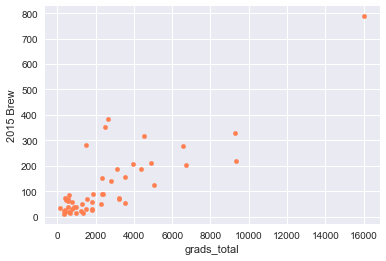

In [113]:
#beers_df.loc['2013':]
bio_beer_fifteen_df.plot.scatter('grads_total', '2015 Brew', marker="o", color = 'coral')

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

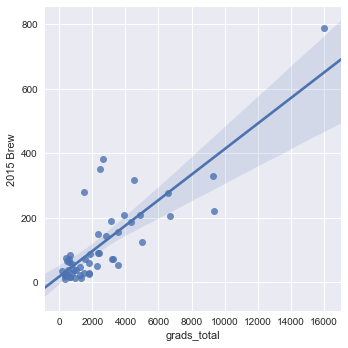

In [114]:
g = sns.lmplot(x='grads_total', y='2015 Brew', data=bio_beer_fifteen_df)
g.axes.set_title('Total Bill vs. Tip', fontsize=34,color="r",alpha=0.5)

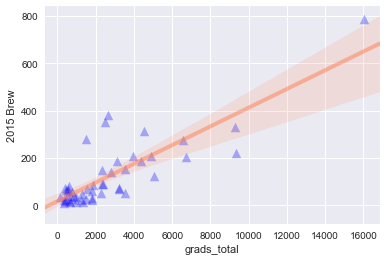

In [115]:
g = sns.regplot(x="grads_total", y="2015 Brew", data=bio_beer_fifteen_df,
    scatter_kws={"color":"blue","alpha":0.3,"s":90},
    line_kws={"color":"coral","alpha":0.5,"lw":4},marker="^")

In [ ]:
#scipy for r squared
#look at 2011 to 2013 to show relationship